In [ ]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import math

Let's create an input tensor which has evenly spaced values on the interval $[0, 2{\pi}]$, and specify `requires_grad=True`. (Like most functions that create tensors, `torch.linspace()` accepts an optional `requires_grad` option.)

Setting `required_grad=True` we are telling PyTorch that we want to compute gradients with respect to that tensor during the backward pass and it signals
PyTorch that all the `operations` on this tensor should be tracked.

This means that in every computation that follows, autograd will be accumulating the history of the computation in the output tensors of that computation.

In [ ]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


In [ ]:
# detach() is useful when you want to perform operations on a tensor but you do not want those operations to be part of the gradient computation.
a.detach()

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832])

In [ ]:
b = torch.sin(a)
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


Let's perform a computation, and plot its output in terms of its inputs:

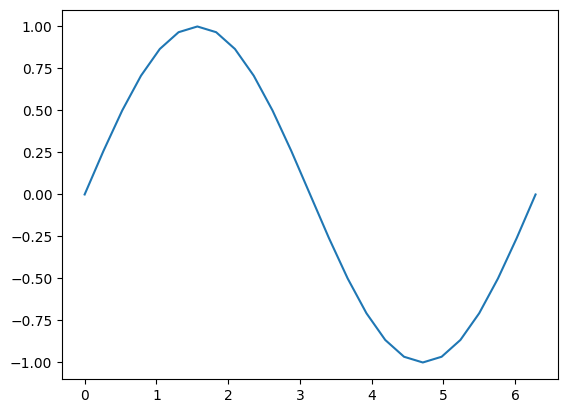

In [ ]:
# Performing a sin operation on to our tensor.
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

Let's have a closer look at the tensor `b`. When we print it, we see an indicator that it is tracking its computation history:

In [ ]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


This `grad_fn` gives us a hint that when we execute the backpropagation step and compute gradients, we'll need to compute the derivative of $sin(x)$ for all this tensor's inputs.

Let's perform some more computations:

In [ ]:
# Performing Multiplication Operation
c = 2 * b #sin(x)
print(c)

# Performing Addition Operation
d = c + 1 #                                2 sin(x) + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


Finally, we compute a single-element output.Since when you call `.backward()` on a tensor with `no arguments`, it expects the calling tensor to contain only a single element, as is the case when computing a `loss function`.

In [ ]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


Each `grad_fn` stored with our tensors allows us to walk the computation all the way back to its inputs with its `next_functions` property.

In [ ]:
print('d:')
print(d.grad_fn)
print("1")
print(d.grad_fn.next_functions)
print("2")
print(d.grad_fn.next_functions[0][0].next_functions)
print("3")
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print("4")
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
1
((<MulBackward0 object at 0x7a9cf8ff0160>, 0), (None, 0))
2
((<SinBackward0 object at 0x7a9cf8ff0160>, 0), (None, 0))
3
((<AccumulateGrad object at 0x7a9cf8ff1e10>, 0),)
4
()

c:

b:

a:
None


With everything in place, let's checkout how do we get derivatives out?

We call the `backward()` method on the output, and then check the input's `grad` property to inspect the gradients:

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


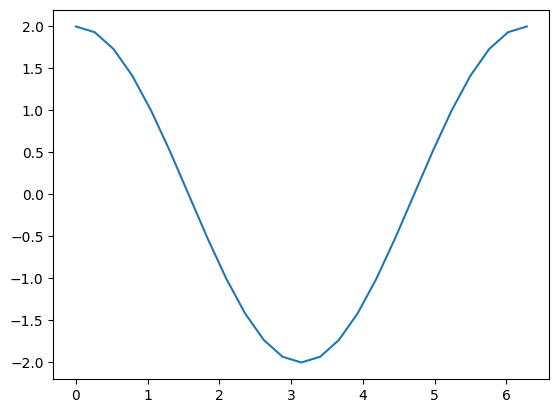

In [ ]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

## Autograd in Neural Network Training

Let's see how does autograd is used for its intended purpose.

Let's define a small model and examine how it changes after a single training batch.

In [ ]:
BATCH_SIZE = 16
DIM_IN = 100
HIDDEN_SIZE = 100
DIM_OUT = 10

In [ ]:
# Sample Input and Output for our Model

torch.manual_seed(42)
X = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
Y = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

In [ ]:
# Let's see how our data looks like
print(X.shape)
print(Y.shape)

torch.Size([16, 100])
torch.Size([16, 10])


In [ ]:
class Model(nn.Module):

    def __init__(self):
        super().__init__()

        self.layer1 = torch.nn.Linear(100, 100)
        self.sigmoid = torch.nn.Sigmoid()
        self.layer2 = torch.nn.Linear(100, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        return x

model = Model()

One thing to notice is that we need not to specify `requires_grad=True` for the model's layers.since within a subclass of `torch.nn.module`, it's assumed that we want to track gradients on the layers' weights for learning.

##Let's Analyse out layers weights.

In [ ]:
print(model.layer1.weight.shape)
print(model.layer1.weight[0].shape)
print(model.layer1.weight[0][0:10])

torch.Size([100, 100])
torch.Size([100])
tensor([-0.0690, -0.0590, -0.0991, -0.0180, -0.0908, -0.0335,  0.0304,  0.0707,
         0.0557,  0.0555], grad_fn=<SliceBackward0>)


Let's see how this changes when we run through one training batch. For a loss function, we'll just use the square of the Euclidean distance between our `prediction` and the `ideal_output`, and we'll use a basic stochastic gradient descent optimizer.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

prediction = model(X)

loss = (Y - prediction).pow(2).sum()
print(loss)

tensor(169.9731, grad_fn=<SumBackward0>)


Now, let's call `loss.backward()` and see what happens:

In [ ]:
loss.backward()
print(model.layer1.weight[0][0:10])
print(model.layer1.weight.grad[0][0:10])

tensor([-0.0690, -0.0590, -0.0991, -0.0180, -0.0908, -0.0335,  0.0304,  0.0707,
         0.0557,  0.0555], grad_fn=<SliceBackward0>)
tensor([-0.6092,  0.0218,  0.1235,  0.2599, -0.1831, -0.4217, -0.1907,  0.0267,
         0.0226,  0.6305])


We can see that the gradients have been computed for each learning weight, but the weights remain unchanged, because we haven't run the optimizer yet. The optimizer is responsible for updating model weights based on the computed gradients.

In [ ]:
optimizer.step()                               w(t+1) = w(t) - ita(gradient(loss_funtion))
print(model.layer1.weight[0][0:10])
print(model.layer1.weight.grad[0][0:10])

tensor([-0.0684, -0.0590, -0.0992, -0.0183, -0.0906, -0.0331,  0.0306,  0.0707,
         0.0557,  0.0549], grad_fn=<SliceBackward0>)
tensor([-0.6092,  0.0218,  0.1235,  0.2599, -0.1831, -0.4217, -0.1907,  0.0267,
         0.0226,  0.6305])


One important thing about the process: After calling `optimizer.step()`,we need to call `optimizer.zero_grad()`, or else every time we run `loss.backward()`, the gradients on the learning weights will accumulate:

In [ ]:
print(model.layer1.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(X)
    loss = (Y - prediction).pow(2).sum()
    loss.backward()

print(model.layer1.weight.grad[0][0:10])

# setting gradients to zero
optimizer.zero_grad()
# error since all the gradients are set to none
print(model.layer1.weight.grad[0][0:10])

tensor([-0.6092,  0.0218,  0.1235,  0.2599, -0.1831, -0.4217, -0.1907,  0.0267,
         0.0226,  0.6305])
tensor([-3.4672,  0.2726,  1.2493,  1.3132, -0.8662, -2.3307, -1.0810,  0.0654,
         0.2021,  3.8622])


TypeError: 'NoneType' object is not subscriptable

After running the cell above, we can see that after running `loss.backward()` multiple times, the magnitudes of most of the gradients will be much larger.

## Turning Autograd Off and On

There are situations where you will need fine-grained control over whether autograd is enabled. There are multiple ways to do this, depending on the situation.

The simplest is to change the `requires_grad` flag on a tensor directly:

In [ ]:
a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In the above cell, we see that `b1` has a `grad_fn` (computation history tracking is ON), which is expect, since it was derived from a tensor, `a`, that had autograd turned on.

When we turn off autograd explicitly with `a.requires_grad = False`, computation history is no longer tracked, which we can see when we compute `b2`.

If you only need autograd turned off temporarily, a better way is to use the `torch.no_grad()`:

In [ ]:
a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = a + b
print(c1)

with torch.no_grad():
    c2 = a + b

print(c2)

c3 = a * b
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


`torch.no_grad()` can also be used as a function or method dectorator:

In [ ]:
def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y


a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
